### Mimic Pivot Table for Tracker Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('All_results_with_res_groups.csv', sep=',', index_col=None); df.head()

,Clip,Res,Res Group,Tracker,IOU_Thresh,Dist_Thresh,SOTP,SOTA,Recall,Precision,...,FPS,fp_count,fp_thresh_count,tp_count,fn_count,tn_count,N_objects,N_frames,N_match,Tracked_Ratio
0,Bike03,1504,High,csrt,0.4,0.1,0.0300,1.0000,1.0000,0.7865,...,18.70,19,0,70,0,0,70,90,70,1.000
1,Slalom01,1504,High,csrt,0.4,0.1,0.1390,0.4242,0.4242,0.4242,...,22.88,0,57,42,0,0,99,100,99,1.000
2,Ski03,1920,High,csrt,0.4,0.1,0.0130,1.0000,1.0000,1.0000,...,15.61,0,0,1113,0,0,1113,1114,1113,1.000
3,Bike09,1920,High,csrt,0.4,0.1,0.0177,0.4218,0.4218,0.9286,...,16.67,11,0,143,196,86,339,437,143,0.422
4,Ski04,1920,High,csrt,0.4,0.1,0.0116,1.0000,1.0000,1.0000,...,16.22,0,0,253,0,0,253,254,253,1.000


### Loop through this line to mass produce the data required for the plots
Where SOTP and High are is where we loop through things

In [52]:
ser = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('High')]; ser

Tracker
csrt          0.016517
goturn        0.234024
kcf           0.010072
medianflow    0.136200
mil           0.112506
mosse         0.025418
tld           0.209228
Name: High, dtype: float64

### VIZZES

In [64]:
N = 7
high_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('High')]
mid_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('Mid')]
low_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('Low')]
trackers = ('csrt', 'goturn', 'kcf', 'medianflow', 'mil', 'mosse', 'tld')
groups = ('High', 'Mid', 'Low')

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
ind = np.arange(N)
width = 0.3

p1 = ax.bar(ind, high_means, width, bottom=0)
p2 = ax.bar(ind+width, mid_means, width, bottom=0)
p3 = ax.bar(ind+2*width, low_means, width, bottom=0)

ax.set_title('Average SOTP per Tracker and Res Group')
ax.set_xticks(ind + width)
ax.set_xticklabels(trackers)

ax.legend((p1[0], p2[0], p3[0]), groups)
ax.autoscale_view()

plt.show()

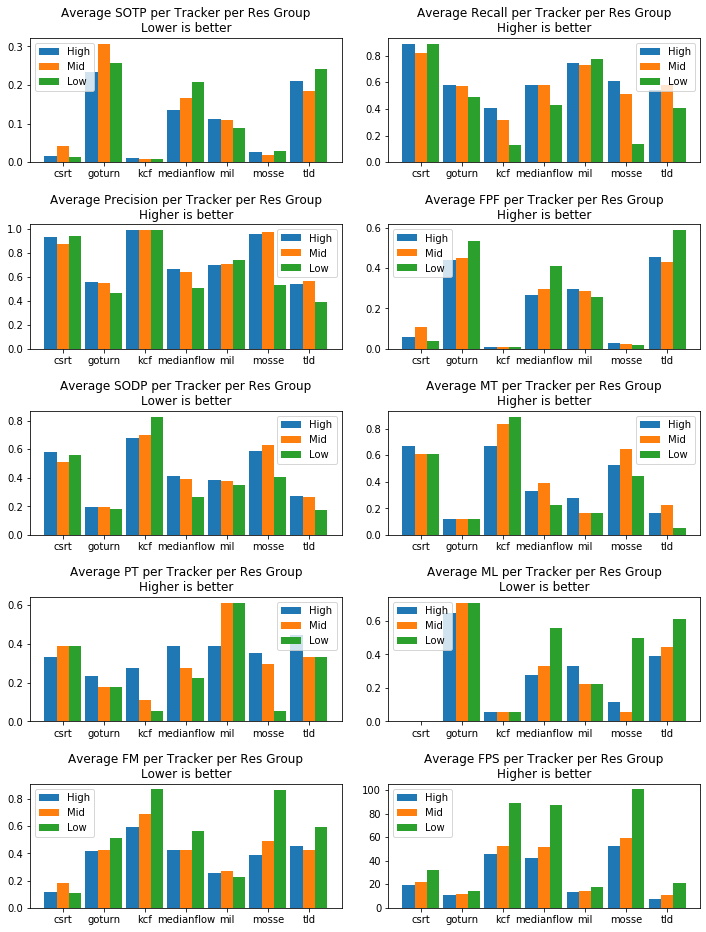

In [93]:
fig, axs = plt.subplots(5,2, figsize=(12, 16))
fig.subplots_adjust(hspace = .5, wspace=.15)

trackers = ('csrt', 'goturn', 'kcf', 'medianflow', 'mil', 'mosse', 'tld')
groups = ('High', 'Mid', 'Low')

data = np.arange(10)
metrics = ('SOTP','Recall','Precision','FPF','SODP','MT','PT','ML','FM','FPS')

for ax, m in zip(axs.ravel(), metrics):
    
    high_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('High')]
    mid_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('Mid')]
    low_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('Low')]
    
    width = 0.3

    p1 = ax.bar(ind, high_means, width, bottom=0)
    p2 = ax.bar(ind+width, mid_means, width, bottom=0)
    p3 = ax.bar(ind+2*width, low_means, width, bottom=0)
    
    def better(x):
        return {
            'SOTP': 'Lower',
            'Recall': 'Higher',
            'Precision': 'Higher',
            'FPF': 'Higher',
            'SODP': 'Lower',
            'MT': 'Higher',
            'PT': 'Higher',
            'ML': 'Lower',
            'FM': 'Lower',
            'FPS': 'Higher',
        }[x]

    ax.set_title('Average ' + str(m) + ' per Tracker per Res Group\n' + better(m) + ' is better')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(trackers)

    ax.legend((p1[0], p2[0], p3[0]), groups)
    ax.autoscale_view()

### Practice and Storage Area

In [ ]:
ser = df.groupby(['Tracker', 'Res Group']).SOTP.mean()
ser

In [ ]:
temp = ser.unstack(); temp

In [11]:
pivot = pd.pivot_table(df, index=['Tracker'], columns=['Res Group'], aggfunc=np.mean, values=['SOTP']); pivot

SOTP                    
Res Group       High       Low       Mid
Tracker                                 
csrt        0.016517  0.012767  0.041028
goturn      0.234024  0.258129  0.306341
kcf         0.010072  0.008200  0.009472
medianflow  0.136200  0.206894  0.167217
mil         0.112506  0.089639  0.110472
mosse       0.025418  0.028060  0.019771
tld         0.209228  0.242356  0.183872